In [1]:
from seriesNet_torch import *
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import torch
import random
import glob
from action_500FN import action, load_dataset
import matplotlib.pyplot as plt
import fn_500_dataset
from fn_500_dataset import ActionDataset
from torch.utils.data import DataLoader
import importlib

In [2]:
dataset = ActionDataset(".\\individual_stocks_5yr/")

lenght :  470
torch.Size([470, 5, 1259])


In [3]:
len(dataset)

470

In [14]:
random.choice(np.arange(470))
myModel = seriesNet(5, nb_causal_block=5,gate_nb_filter=16, nb_block_dropped=3)
print(myModel)

seriesNet(
  (module_block): ModuleList(
    (0): gated_block(
      (pad_input): ReflectionPad1d((1, 0))
      (conv): Conv1d(5, 16, kernel_size=(2,), stride=(1,), bias=False, padding_mode=reflect)
      (network_in): Conv1d(16, 5, kernel_size=(1,), stride=(1,), bias=False)
      (skipout): Conv1d(16, 5, kernel_size=(1,), stride=(1,), bias=False)
    )
    (1): gated_block(
      (pad_input): ReflectionPad1d((2, 0))
      (conv): Conv1d(5, 16, kernel_size=(2,), stride=(1,), dilation=(2,), bias=False, padding_mode=reflect)
      (network_in): Conv1d(16, 5, kernel_size=(1,), stride=(1,), bias=False)
      (skipout): Conv1d(16, 5, kernel_size=(1,), stride=(1,), bias=False)
    )
    (2): gated_block(
      (pad_input): ReflectionPad1d((4, 0))
      (conv): Conv1d(5, 16, kernel_size=(2,), stride=(1,), dilation=(4,), bias=False, padding_mode=reflect)
      (network_in): Conv1d(16, 5, kernel_size=(1,), stride=(1,), bias=False)
      (skipout): Conv1d(16, 5, kernel_size=(1,), stride=(1,), bi

In [25]:
# LES DATA DOIVENT ETRE DE LA FORME (N, C, TIMESERIES) OU N EST LE NOMBRE D'ELEMENTS DANS LA MINI BATCH
# C LE NOMBRE DE CANAUX, ET TIMESERIES LE NOMBRE DE POINTS DANS LA SERIE CHRONOLOGIQUE
#print(CC.size())
# SEPARER LES CIBLES DE L'OUTPUT
data = AA[:,:,:-1].float()

target = AA[:,:,1:].float()

N = 10
# INITIALISER LE MODELE :
myModel = seriesNet(5, nb_causal_block=5,gate_nb_filter=16, nb_block_dropped=3)
myModel = myModel.float()

# CHOISIR UNE LOSS
criterion = nn.MSELoss()
optimizer = optim.SGD(myModel.parameters(), lr=0.001, weight_decay=0.01)
#choice = torch.multinomial(torch.tensor(np.arange(data.size()[0])).float(), 1)
for i in range(100):
    choice = torch.multinomial(torch.tensor(np.arange(data.size()[0])).float(), N)
    output = myModel(data[choice])
    print(((output-target[choice])**2).sum())
    optimizer.zero_grad()
    
    loss = criterion(output, target[choice])  
    print(" loss : ", loss)
    loss.backward()
    #print(myModel.conv_final.weight.grad)
    #print("test 2 ")
    #print(myModel.gated_block2.conv.weight.grad)
    optimizer.step()



tensor(79144.1250, grad_fn=<SumBackward0>)
 loss :  tensor(1.2583, grad_fn=<MseLossBackward>)
tensor(78501.2812, grad_fn=<SumBackward0>)
 loss :  tensor(1.2480, grad_fn=<MseLossBackward>)
tensor(75101.5469, grad_fn=<SumBackward0>)
 loss :  tensor(1.1940, grad_fn=<MseLossBackward>)
tensor(75496.5781, grad_fn=<SumBackward0>)
 loss :  tensor(1.2003, grad_fn=<MseLossBackward>)
tensor(76166.3438, grad_fn=<SumBackward0>)
 loss :  tensor(1.2109, grad_fn=<MseLossBackward>)
tensor(76414.7578, grad_fn=<SumBackward0>)
 loss :  tensor(1.2149, grad_fn=<MseLossBackward>)
tensor(73800.2500, grad_fn=<SumBackward0>)
 loss :  tensor(1.1733, grad_fn=<MseLossBackward>)
tensor(71226.1562, grad_fn=<SumBackward0>)
 loss :  tensor(1.1324, grad_fn=<MseLossBackward>)
tensor(75339.8594, grad_fn=<SumBackward0>)
 loss :  tensor(1.1978, grad_fn=<MseLossBackward>)
tensor(75581.6875, grad_fn=<SumBackward0>)
 loss :  tensor(1.2016, grad_fn=<MseLossBackward>)
tensor(76506.2031, grad_fn=<SumBackward0>)
 loss :  tensor(1

In [20]:
importlib.reload(fn_500_dataset)
dataset = fn_500_dataset.ActionDataset(".\\individual_stocks_5yr/", normalise=True)
dataset_train, data_test = dataset[0:400].float(), dataset[400:].float() #torch.utils.data.random_split(dataset, [400,70])
print(len(dataset))
print(len(dataset_train))
print(len(data_test))
training_loader = DataLoader(dataset_train, batch_size=10, shuffle=False, drop_last=False)

lenght :  470
torch.Size([470, 5, 1259])
470
400
70


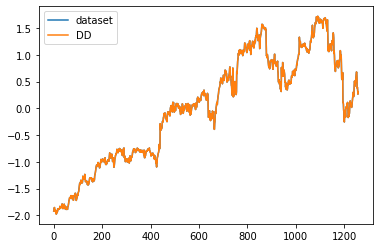

In [29]:
a = dataset[0:400]
i=random.randint(0,400)
plt.plot(dataset[i][1],label='dataset')
AA = (DD - DD.mean(axis=2).reshape(470,5,1)) / DD.std(axis=2).reshape(470,5,1)
plt.plot(AA[i,1], label='DD')
plt.legend()
#print(a.size() == DD[0:400].size())

epoch 0


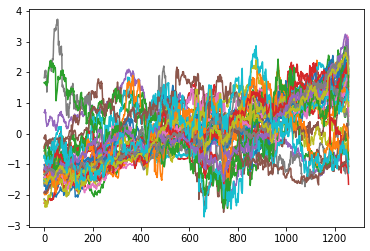

In [99]:
myModel = seriesNet(5, nb_causal_block=5,gate_nb_filter=16, nb_block_dropped=2)
#myModel = myModel.float()
dataset.float()
# CHOISIR UNE LOSS
criterion = nn.MSELoss()
optimizer = optim.SGD(myModel.parameters(), lr=0.0001, weight_decay=0.01)
#choice = torch.multinomial(torch.tensor(np.arange(data.size()[0])).float(), 1)
for i in range(1):
    print('epoch {}'.format(i))
    for i,batch in enumerate(training_loader):
        #print("batch s{}".format(i))
        inputModel, target = batch[:,:,:-1], batch[:,:,1:]
        plt.plot(inputModel[0,2])

In [23]:
dataset = fn_500_dataset.ActionDataset(".\\individual_stocks_5yr/", normalise=True)
dataset.float()
dataset_train, dataset_validation = torch.utils.data.random_split(dataset, (400, 70))
print(len(dataset))
print(len(dataset_train))
print(len(dataset_validation))
training_loader = DataLoader(dataset_train, batch_size=10, shuffle=True, drop_last=False)
valid_loader = DataLoader(dataset_validation, batch_size=10, shuffle=True, drop_last=False)

lenght :  470
torch.Size([470, 5, 1259])
470
400
70


In [26]:
# LES DATA DOIVENT ETRE DE LA FORME (N, C, TIMESERIES) OU N EST LE NOMBRE D'ELEMENTS DANS LA MINI BATCH
# C LE NOMBRE DE CANAUX, ET TIMESERIES LE NOMBRE DE POINTS DANS LA SERIE CHRONOLOGIQUE
# INITIALISER LE MODELE :
myModel = seriesNet(5, nb_causal_block=5,gate_nb_filter=16, nb_block_dropped=2)
myModel = myModel.float()
#dataset.float()
# CHOISIR UNE LOSS
criterion = nn.MSELoss()
optimizer = optim.SGD(myModel.parameters(), lr=0.001, weight_decay=0.01)
# TRACE DES METRICS
training_loss_epoch = []
valid_loss_epoch = []
#choice = torch.multinomial(torch.tensor(np.arange(data.size()[0])).float(), 1)
for i in range(20):
    print('epoch {}'.format(i+1))
    training_loss = []
    for j,batch in enumerate(training_loader):
        inputModel, target = batch[:,:,:-1], batch[:,:,1:]
        output = myModel(inputModel)
        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        #print(" loss : ", loss)
        optimizer.step()
        training_loss.append(loss.item())
        #print(training_loss)
    training_loss_epoch.append(np.mean(training_loss))
    myModel.eval()
    with torch.no_grad():
        valid_loss=[]
        for batch in valid_loader:
            inputModel, target = batch[:,:,:-1], batch[:,:,1:]
            output = myModel(inputModel)
            loss = criterion(output, target)
            valid_loss.append(loss.item())
        valid_loss_epoch.append(np.mean(valid_loss))
    print('Validation loss %.3f' % (valid_loss_epoch[-1]))

epoch 0
Validation loss 0.972
epoch 1
Validation loss 0.829
epoch 2
Validation loss 0.713
epoch 3
Validation loss 0.626
epoch 4
Validation loss 0.560
epoch 5
Validation loss 0.508
epoch 6
Validation loss 0.468
epoch 7
Validation loss 0.436
epoch 8
Validation loss 0.411
epoch 9
Validation loss 0.388
epoch 10
Validation loss 0.367
epoch 11
Validation loss 0.348
epoch 12
Validation loss 0.331
epoch 13
Validation loss 0.315
epoch 14
Validation loss 0.301
epoch 15
Validation loss 0.288
epoch 16
Validation loss 0.278
epoch 17
Validation loss 0.270
epoch 18
Validation loss 0.263
epoch 19
Validation loss 0.257


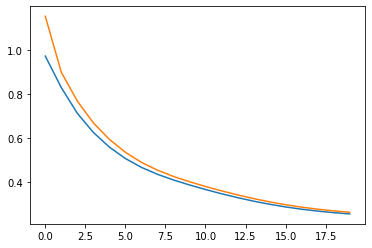

In [28]:
plt.plot(valid_loss_epoch)
plt.plot(training_loss_epoch)